# K-Means Implementation

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv('C:/Users/dell/Downloads/winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Outlier Treatment

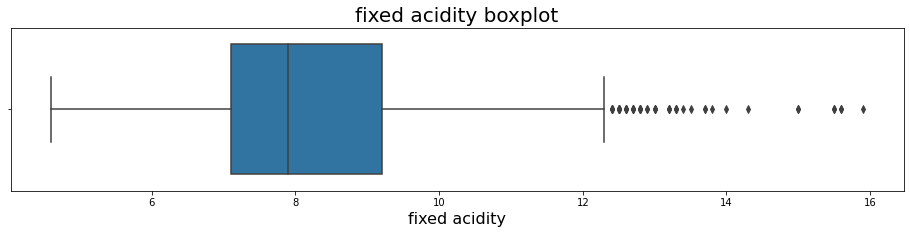

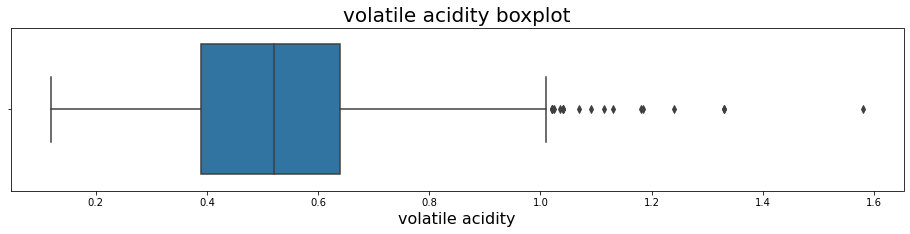

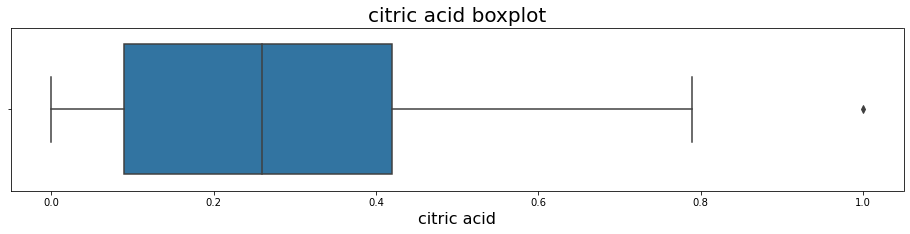

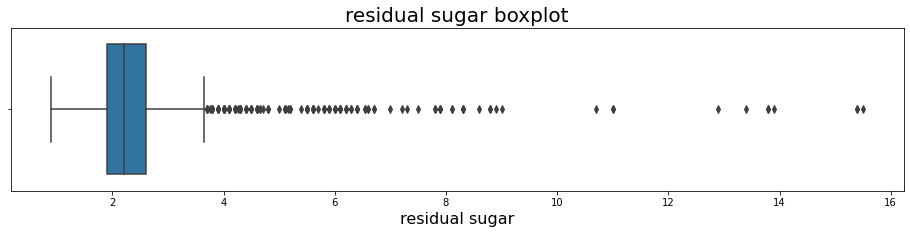

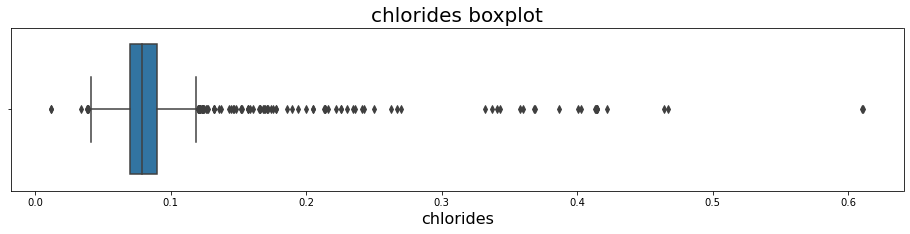

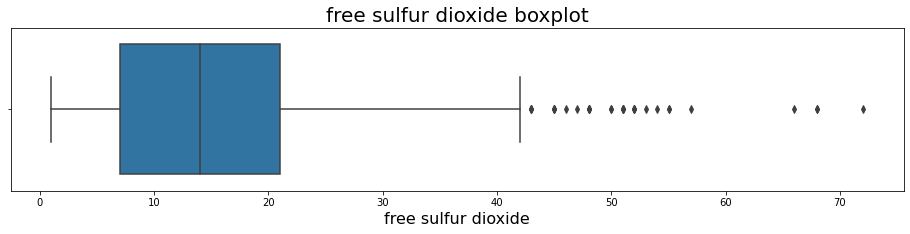

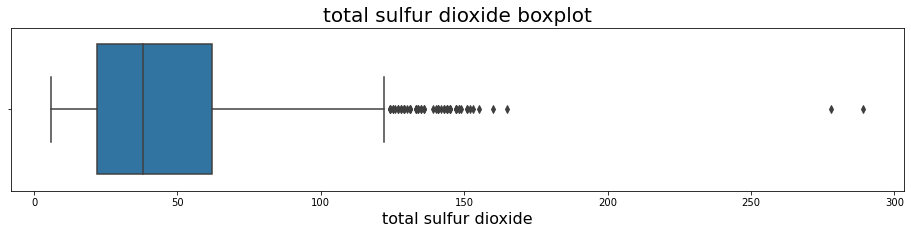

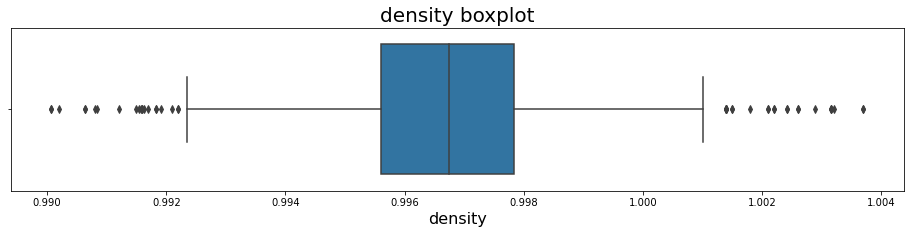

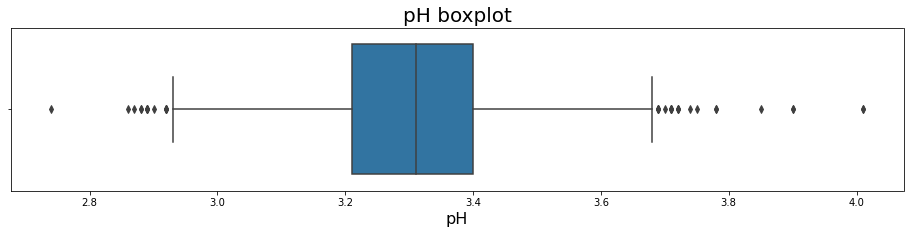

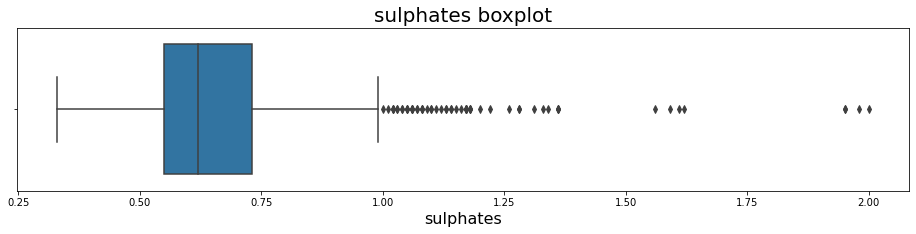

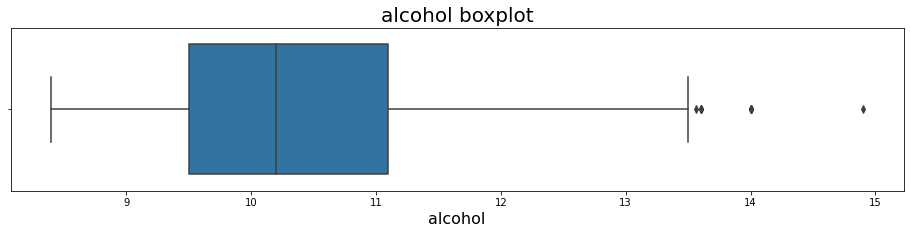

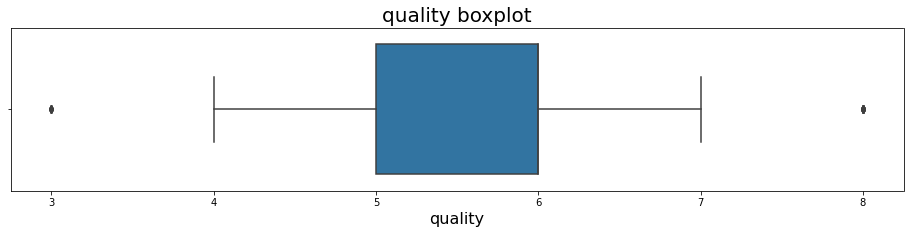

In [8]:
for col_name in data:
    plt.figure(figsize=(16, 3))
    sns.boxplot(x=data[col_name])
    plt.title(col_name + " boxplot", fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.show()

In [11]:
for col_name in data:
    # removing (statistical) outliers
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    data = data[(data[col_name] >= Q1 - 1.5*IQR) & (data[col_name] <= Q3 + 1.5*IQR)]

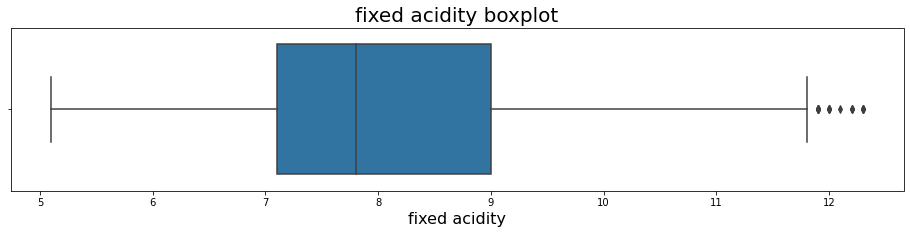

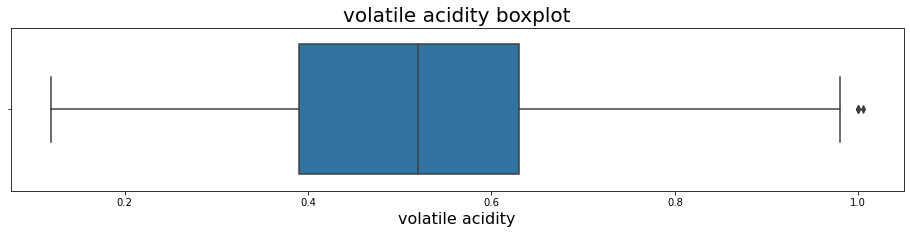

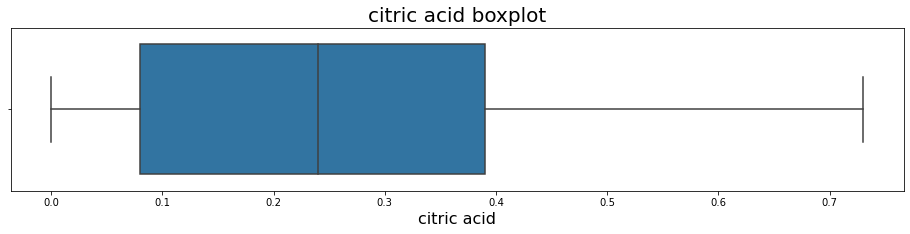

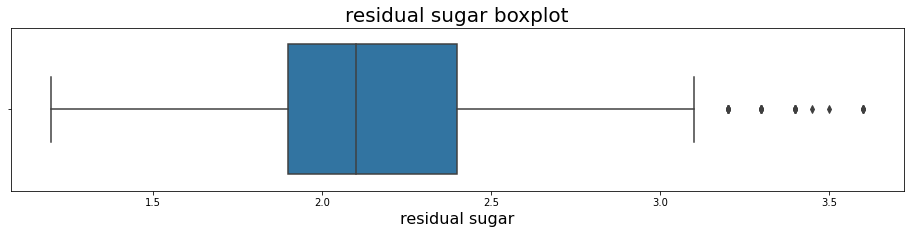

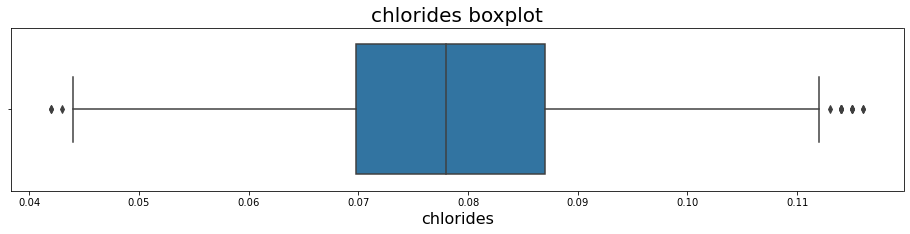

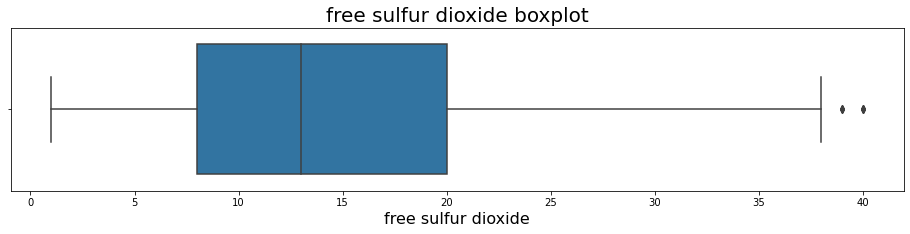

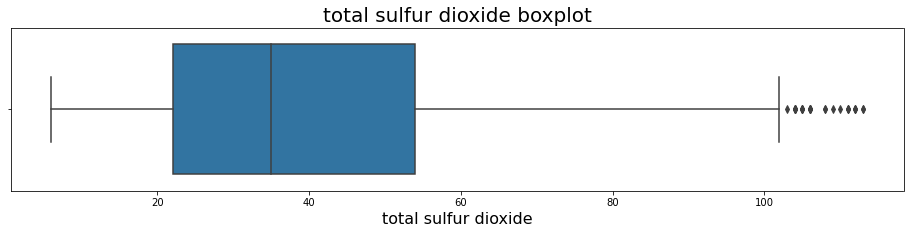

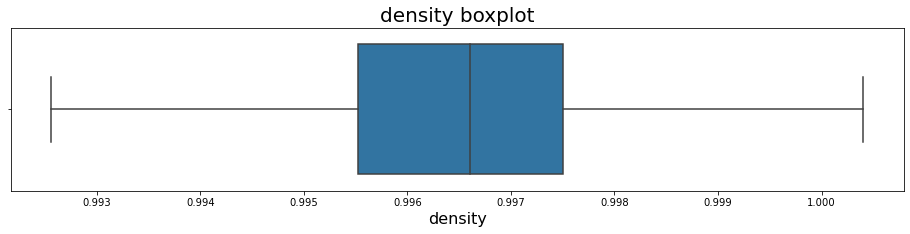

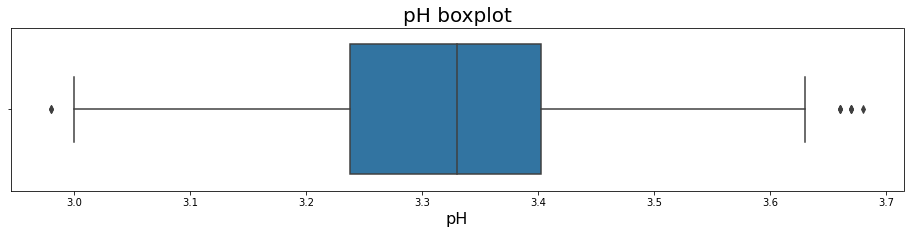

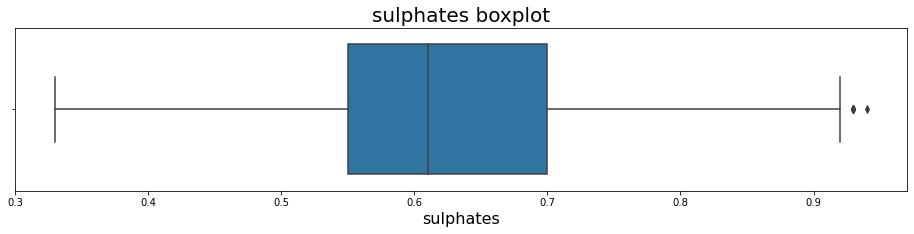

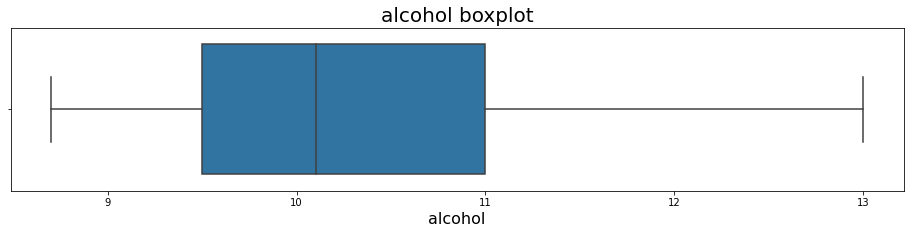

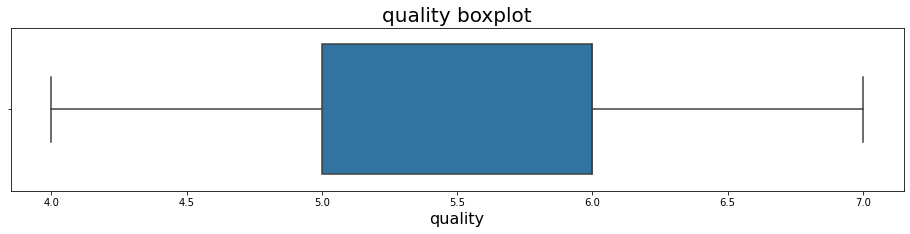

In [12]:
for col_name in data:
    plt.figure(figsize=(16, 3))
    sns.boxplot(x=data[col_name])
    plt.title(col_name + " boxplot", fontsize=20)
    plt.xlabel(col_name, fontsize=16)
    plt.show()

In [13]:
data.shape

(1124, 12)

# Model Implementation

In [14]:
clustering_kmeans = KMeans(n_clusters=2, precompute_distances="auto", n_jobs=-1)
clustering_kmeans = clustering_kmeans.fit(data)
data['clusters'] = clustering_kmeans.predict(data)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


Text(0, 0.5, 'WCSS')

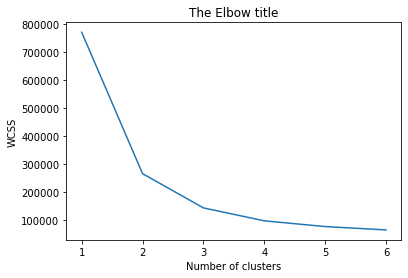

In [16]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(data)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

number_clusters = range(1,7)
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [20]:
kmeans = KMeans(n_clusters=3, precompute_distances="auto", n_jobs=-1,max_iter=50)
kmeans.fit(data)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:968: FutureWarning: 'precompute_distances' was deprecated in version 0.23 and will be removed in 0.25. It has no effect
  warnings.warn("'precompute_distances' was deprecated in version "
C:\Users\dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(max_iter=50, n_clusters=3, n_jobs=-1, precompute_distances='auto')

In [21]:
data['cluster_id'] = kmeans.labels_
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters,cluster_id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,0,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,0,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,1,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,1,1
10,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,0,0


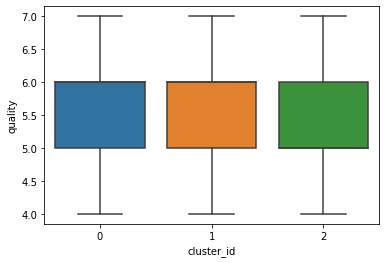

In [24]:
# plot
sns.boxplot(x='cluster_id', y='quality', data=data)

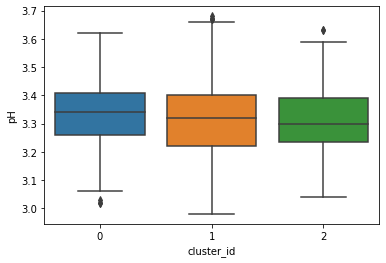

In [25]:
# plot
sns.boxplot(x='cluster_id', y='pH', data=data)

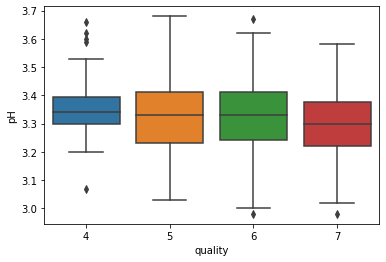

In [26]:
# plot
sns.boxplot(x='quality', y='pH', data=data)

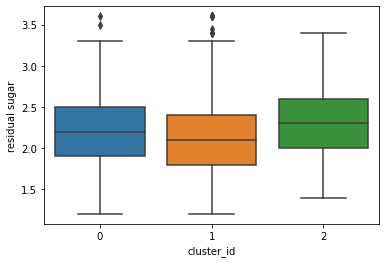

In [27]:
# plot
sns.boxplot(x='cluster_id', y='residual sugar', data=data)

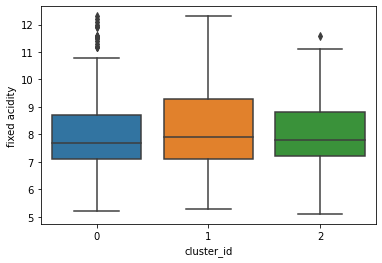

In [28]:
# plot
sns.boxplot(x='cluster_id', y='fixed acidity', data=data)